<a href="https://colab.research.google.com/github/HKubinhetz/DS-LEGOStudies/blob/main/Lego_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LEGO Dataset Analysis 
<img src="https://i.imgur.com/49FNOHj.jpg">


# Introduction

Today we'll dive deep into a dataset all about LEGO. From the dataset we can ask whole bunch of interesting questions about the history of the LEGO company, their product offering, and which LEGO set ultimately rules them all:

<ul type="square">
<li>What is the most enormous LEGO set ever created and how many parts did it have?</li>

<li>How did the LEGO company start out? In which year were the first LEGO sets released and how many sets did the company sell when it first launched?</li>

<li>Which LEGO theme has the most sets? Is it one of LEGO's own themes like Ninjago or a theme they licensed liked Harry Potter or Marvel Superheroes?</li>

<li>When did the LEGO company really expand its product offering? Can we spot a change in the company strategy based on how many themes and sets did it released year-on-year?</li>

<li>Did LEGO sets grow in size and complexity over time? Do older LEGO 
sets tend to have more or fewer parts than newer sets?</li>
</ul>

**Data Source**

[Rebrickable](https://rebrickable.com/downloads/) has compiled data on all the LEGO pieces in existence. I recommend you use download the .csv files provided in this lesson. 

# Import Statements

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data Exploration

**Challenge**: How many different colours does the LEGO company produce? Read the colors.csv file in the data folder and find the total number of unique colours. Try using the [.nunique() method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nunique.html?highlight=nunique#pandas.DataFrame.nunique) to accomplish this.

In [ ]:
# Creating the Colors DF and printing it's first rows
colors_df = pd.read_csv('/content/drive/MyDrive/PythonDS/03 - Lego Analysis/data/colors.csv')
colors_df.head()

,id,name,rgb,is_trans
0,-1,Unknown,0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f


In [ ]:
# Understanding the shape and data:
print(f"The shape of the dataframe is {colors_df.shape}")
print(f"Checking for NaN values:")
colors_df.isna().any()

The shape of the dataframe is (135, 4)
Checking for NaN values:


id          False
name        False
rgb         False
is_trans    False
dtype: bool

In [ ]:
unique_colors = colors_df['name'].nunique(0)
print(f"There are {unique_colors} different colors produced by LEGO.")

There are 135 different colors produced by LEGO.


**Challenge**: Find the number of transparent colours where <code>is_trans == 't'</code> versus the number of opaque colours where <code>is_trans == 'f'</code>. See if you can accomplish this in two different ways.

In [ ]:
# Method 1 - Grouping the Dataset and Counting how much of each option there is: 
colors_group = colors_df.groupby('is_trans').count()
print(colors_group)

           id  name  rgb
is_trans                
f         107   107  107
t          28    28   28


In [ ]:
# Method 2 - Using loc method
transparent_df = colors_df.loc[colors_df['is_trans']=='t']
print(transparent_df.name.count())

28


### **Understanding LEGO Themes vs. LEGO Sets**

Walk into a LEGO store and you will see their products organised by theme. Their themes include Star Wars, Batman, Harry Potter and many more.

<img src="https://i.imgur.com/aKcwkSx.png">

A lego **set** is a particular box of LEGO or product. Therefore, a single theme typically has many different sets.

<img src="https://i.imgur.com/whB1olq.png">

The <code>sets.csv</code> data contains a list of sets over the years and the number of parts that each of these sets contained.

**Challenge**: Read the sets.csv data and take a look at the first and last couple of rows. 

# Studying Sets of LEGOS

In [158]:
# Creating a new Dataframe
sets_df = pd.read_csv("/content/drive/MyDrive/PythonDS/03 - Lego Analysis/data/sets.csv")

In [ ]:
# Printing the first rows:
sets_df.head()

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


In [ ]:
# Printing the last rows:
sets_df.tail()

,set_num,name,year,theme_id,num_parts
15705,wwgp1-1,Wild West Limited Edition Gift Pack,1996,476,0
15706,XMASTREE-1,Christmas Tree,2019,410,26
15707,XWING-1,Mini X-Wing Fighter,2019,158,60
15708,XWING-2,X-Wing Trench Run,2019,158,52
15709,YODACHRON-1,Yoda Chronicles Promotional Set,2013,158,413


**Challenge**: In which year were the first LEGO sets released and what were these sets called?

In [ ]:
# This are the first LEGO sets ever released:
sets_df.sort_values('year').head(10)

,set_num,name,year,theme_id,num_parts
9521,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
9534,700.2-1,Large Gift Set (ABB),1949,365,178
9539,700.3-1,Medium Gift Set (ABB),1949,365,142
9544,700.A-1,Small Brick Set (ABB),1949,371,24
9545,700.B-1,Small Doors and Windows Set (ABB),1949,371,12
9526,700.1.2-1,Single 2 x 2 Brick (ABB),1950,371,1
9546,700.B.1-1,Single 1 x 4 x 2 Window without Glass (ABB),1950,371,1
9523,700.1.1-1,Single 2 x 4 Brick (ABB),1950,371,1
9548,700.B.3-1,Single 1 x 2 x 2 Window without Glass (ABB),1950,371,1
9549,700.B.4-1,Single 1 x 2 x 4 Door without Glass (ABB),1950,371,1


In [ ]:
# Answer
first_legos_year = sets_df.year.min()
first_legos_names = sets_df[sets_df['year'] == first_legos_year].name.values
print(f"The first lego sets were released in {first_legos_year} and their names were: \n")

for lego in first_legos_names:
  print(lego)


The first lego sets were released in 1949 and their names were: 

Extra-Large Gift Set (ABB)
Large Gift Set (ABB)
Medium Gift Set (ABB)
Small Brick Set (ABB)
Small Doors and Windows Set (ABB)


**Challenge**: How many different sets did LEGO sell in their first year? How many types of LEGO products were on offer in the year the company started?

In [ ]:
first_legos = sets_df[sets_df.year == first_legos_year]
print(f"LEGO sold {first_legos.name.count()} sets in their first year of operation, all the way back to {first_legos_year}!")

LEGO sold 5 sets in their first year of operation, all the way back to 1949!


**Challenge**: Find the top 5 LEGO sets with the most number of parts. 

In [ ]:
top_legos = sets_df.sort_values(by='num_parts', ascending=False)
top_legos.head(5)

,set_num,name,year,theme_id,num_parts
15004,BIGBOX-1,The Ultimate Battle for Chima,2015,571,9987
11183,75192-1,UCS Millennium Falcon,2017,171,7541
10551,71043-1,Hogwarts Castle,2018,246,6020
295,10256-1,Taj Mahal,2017,673,5923
221,10189-1,Taj Mahal,2008,673,5922


**Challenge**: Use <code>.groupby()</code> and <code>.count()</code> to show the number of LEGO sets released year-on-year. How do the number of sets released in 1955 compare to the number of sets released in 2019? 

In [47]:
# Building a grouped dataset
yearly_releases = sets_df.groupby('year').count()['set_num']
print("These are the yearly releases of LEGO sets, all the way from 1949:")
print(yearly_releases)

These are the yearly releases of LEGO sets, all the way from 1949:
year
1949      5
1950      6
1953      4
1954     14
1955     28
       ... 
2017    786
2018    816
2019    840
2020    674
2021      3
Name: set_num, Length: 71, dtype: int64


In [50]:
print(f"As a comparisson, {yearly_releases[1949]} sets were released in 1949 and a whopping {yearly_releases[2019]} sets were released in 2019!")

As a comparisson, 5 sets were released in 1949 and a whopping 840 sets were released in 2019!


**Challenge**: Show the number of LEGO releases on a line chart using Matplotlib. <br>
<br>
Note that the .csv file is from late 2020, so to plot the full calendar years, you will have to exclude some data from your chart. Can you use the slicing techniques covered in Day 21 to avoid plotting the last two years? The same syntax will work on Pandas DataFrames. 

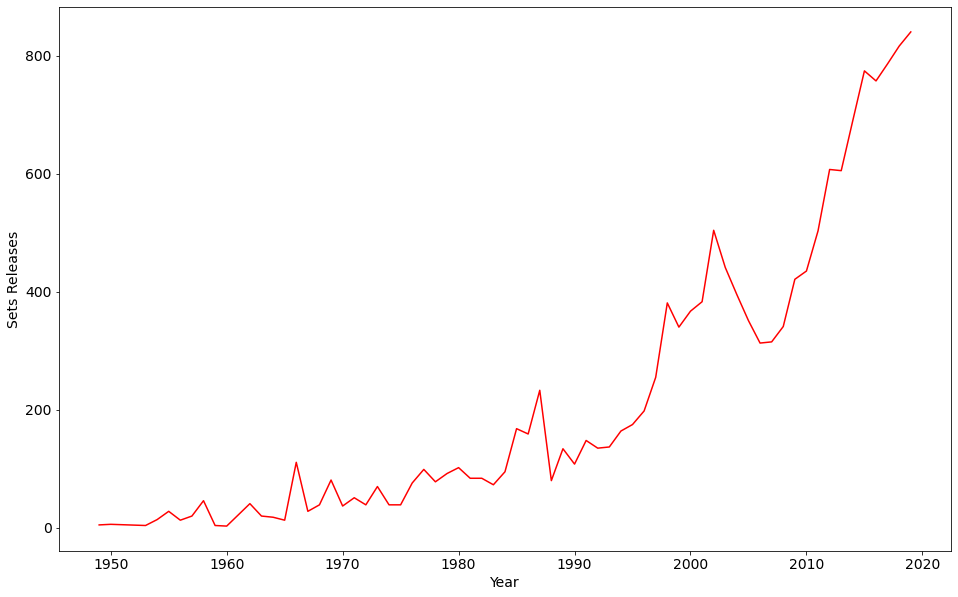

In [64]:
# Chart sizing
plt.figure(figsize=(16,10)) 

# Axis fonts
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Axis labels
plt.xlabel('Year', fontsize=14)
plt.ylabel('Sets Releases', fontsize=14)


plt.plot(yearly_releases[:-2], color="red")

### Aggregate Data with the Python .agg() Function

Let's work out the number of different themes shipped by year. This means we have to count the number of unique theme_ids per calendar year.

In [66]:
# Creating an aggregated series
sets_by_year = sets_df.groupby('year').agg({"theme_id": pd.Series.nunique})
print(sets_by_year)

      theme_id
year          
1949         2
1950         1
1953         2
1954         2
1955         4
...        ...
2017        89
2018        93
2019        78
2020        82
2021         1

[71 rows x 1 columns]


**Challenge**: Plot the number of themes released by year on a line chart. Only include the full calendar years (i.e., exclude 2020 and 2021). 

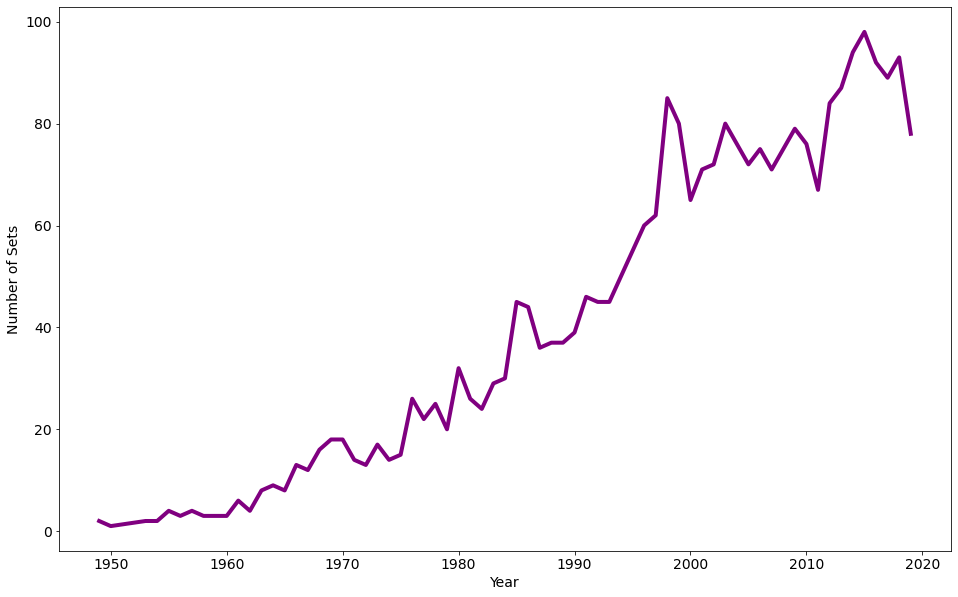

In [78]:
# Configuring the graph size
plt.figure(figsize=(16,10))

# Configuring font size:
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Configuring graph Labels:
plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of Sets", fontsize=14)

plt.plot(sets_by_year[:-2], color="purple", linewidth=4)

### Line Charts with Two Seperate Axes

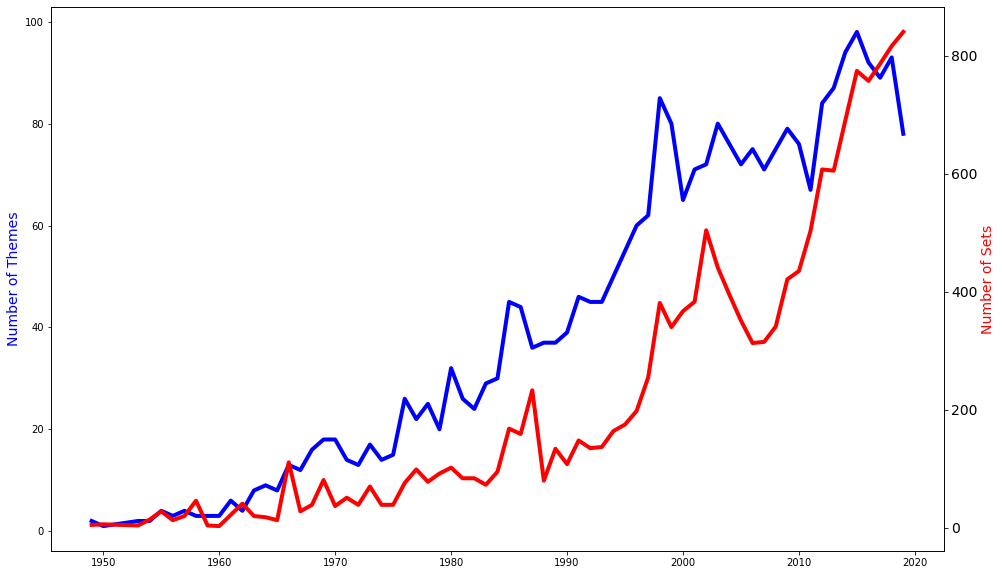

In [89]:
# Configuring the graph size
plt.figure(figsize=(16,10))

# Creating double axes
ax1 = plt.gca() # get current axes
ax2 = ax1.twinx() 

# Configuring graph Labels:
plt.xlabel("Year", fontsize=14)
ax1.set_ylabel("Number of Themes", fontsize=14, color='blue')
ax2.set_ylabel("Number of Sets", fontsize=14, color='red')

# Configuring font size:
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Plotting a multi-axis graph
ax1.plot(sets_by_year[:-2], color="blue", linewidth=4)
ax2.plot(yearly_releases[:-2], color="red", linewidth=4)


**Challenge**: Use the <code>.groupby()</code> and <code>.agg()</code> function together to figure out the average number of parts per set. How many parts did the average LEGO set released in 1954 compared to say, 2017?

In [120]:
# Creating an aggregated series
pd.options.display.float_format = '{:,.2f}'.format
parts_per_set = sets_df.groupby('year').agg({"num_parts": pd.Series.mean})
parts_per_set

,num_parts
year,
1949,99.60
1950,1.00
1953,13.50
1954,12.36
1955,36.61
...,...
2017,221.84
2018,213.62
2019,207.51


In [124]:
# Building the comparison
early_parts = '{0:.2f}'.format(parts_per_set.loc[1954].values[0])
late_parts = '{0:.2f}'.format(parts_per_set.loc[2017].values[0])
print(f"The complexity of LEGO sets also changed over time! Sets released in 1954 had an average of {early_parts} pieces, but sets in 2017 had about {late_parts} in their composition!")

The complexity of LEGO sets also changed over time! Sets released in 1954 had an average of 12.36 pieces, but sets in 2017 had about 221.84 in their composition!


### Scatter Plots in Matplotlib

**Challenge**: Has the size and complexity of LEGO sets increased over time based on the number of parts? Plot the average number of parts over time using a Matplotlib scatter plot. See if you can use the [scatter plot documentation](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.scatter.html) before I show you the solution. Do you spot a trend in the chart? 

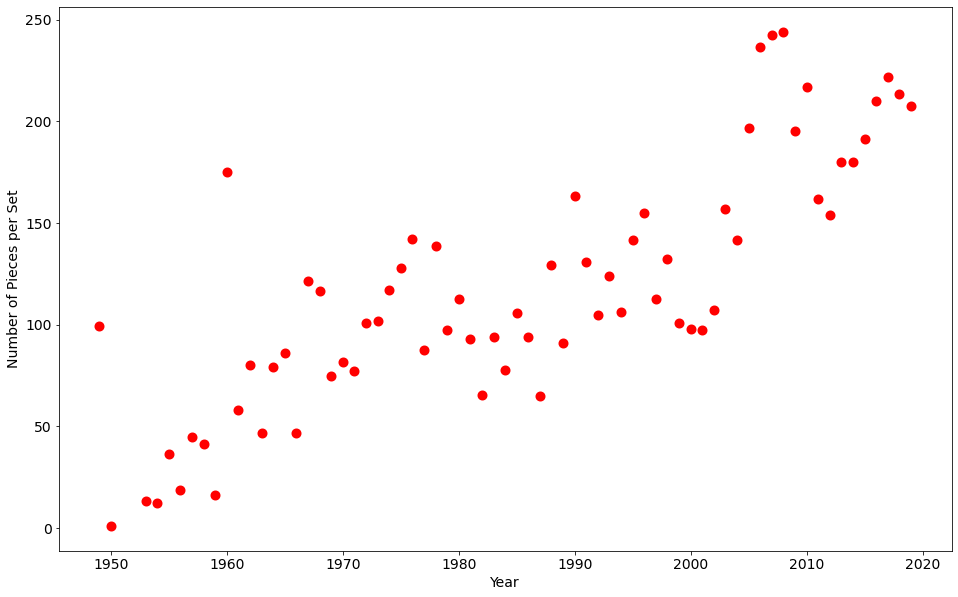

In [135]:
# Configuring the graph size
plt.figure(figsize=(16,10))

# Configuring font size:
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Configuring graph Labels:
plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of Pieces per Set", fontsize=14)

# Plotting a scatterplot!
plt.scatter(x=parts_per_set.index[:-2], y=parts_per_set.num_parts[:-2], color='red', linewidths=4)

### Number of Sets per LEGO Theme

LEGO has licensed many hit franchises from Harry Potter to Marvel Super Heros to many others. But which theme has the largest number of individual sets? 

In [148]:
themed_sets = sets_df["theme_id"].value_counts()
themed_sets

158    753
501    656
494    398
435    356
503    329
      ... 
307      1
215      1
361      1
210      1
414      1
Name: theme_id, Length: 571, dtype: int64

**Challenge** Use what you know about HTML markup and tags to display the database schema: https://i.imgur.com/Sg4lcjx.png

<img src=https://i.imgur.com/Sg4lcjx.png>

### Database Schemas, Foreign Keys and Merging DataFrames

The themes.csv file has the actual theme names. The sets .csv has <code>theme_ids</code> which link to the <code>id</code> column in the themes.csv. 

**Challenge**: Explore the themes.csv. How is it structured? Search for the name 'Star Wars'. How many <code>id</code>s correspond to this name in the themes.csv? Now use these <code>id</code>s and find the corresponding the sets in the sets.csv (Hint: you'll need to look for matches in the <code>theme_id</code> column)

In [157]:
# Loading and studying the set
themes_df = pd.read_csv("/content/drive/MyDrive/PythonDS/03 - Lego Analysis/data/themes.csv")
print(themes_df)

      id                   name  parent_id
0      1                Technic        NaN
1      2         Arctic Technic       1.00
2      3            Competition       1.00
3      4         Expert Builder       1.00
4      5                  Model       1.00
..   ...                    ...        ...
591  705               Iron Man     696.00
592  706             Spider-Man     696.00
593  707                  X-Men     696.00
594  708  The LEGO Batman Movie     697.00
595  709               LEGO Art        NaN

[596 rows x 3 columns]


In [161]:
# Searching for LEGO Star Wars sets
themes_df[themes_df['name' == "Star Wars"]]

KeyError: ignored

### Merging (i.e., Combining) DataFrames based on a Key
